## Neural Network Implementation from Scratch - Lab Assignment 1

### Student Information
- **Name**: Kaustubh Wagh
- **Roll Number**: 202201070021
- **Batch**: T1

---

### Objective
Implement a simple feedforward neural network from scratch in Python using only NumPy. The goal is to predict median house prices using the California Housing dataset. This implementation includes all key components like forward pass, backpropagation, and training using gradient descent.

---

### Dataset Description

We use the **California Housing Dataset** available from sklearn.datasets. It contains 20,640 samples with 8 features each, such as median income, average rooms, population, etc. The target is the **median house value** in hundreds of thousands of dollars.

This is a **regression problem**.

Dataset Link: https://www.kaggle.com/datasets/dhirajnirne/california-housing-data?resource=download

---


In [28]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess the data
data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)  # Reshape target to be 2D

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Neural Network Architecture

- **Input layer**: 8 neurons (8 features)
- **Hidden layer**: 10 neurons
- **Output layer**: 1 neuron (predicted median house value)
- **Activation function (hidden layer)**: ReLU
- **Activation function (output layer)**: Linear (since this is a regression problem)

---


In [29]:
# Activation functions and their derivatives
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return z > 0

def linear(z):
    return z  # for regression

def linear_derivative(z):
    return np.ones_like(z)


### Forward Pass

This function computes the outputs of the network layer by layer:

- Z = W·X + b
- A = activation(Z)

---


In [30]:
# Initialize weights and biases
np.random.seed(1)
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
lr = 0.01  # learning rate
epochs = 10000

# Weights and biases
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Forward pass
def forward_pass(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = linear(Z2)
    return Z1, A1, Z2, A2


## Loss Function

We use **Mean Squared Error (MSE)** as this is a regression task:

---


In [31]:
# Loss function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size


## Backpropagation

We compute gradients for all parameters using the chain rule:

1. Compute loss derivative w.r.t A2
2. Backpropagate through output and hidden layers
3. Update weights and biases using gradient descent

---


In [32]:
# Training loop
losses = []

for epoch in range(epochs):
    # Forward pass
    Z1, A1, Z2, A2 = forward_pass(X_train)

    # Compute loss
    loss = mse(y_train, A2)
    losses.append(loss)

    # Backward pass
    dA2 = mse_derivative(y_train, A2)
    dZ2 = dA2 * linear_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X_train.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    # Print loss every 100 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 5.629411552699166
Epoch 500, Loss: 0.6253014541497228
Epoch 1000, Loss: 0.5103673290539986
Epoch 1500, Loss: 0.47427527471470415
Epoch 2000, Loss: 0.4611844889072409
Epoch 2500, Loss: 0.44975879400771585
Epoch 3000, Loss: 0.4391022798062261
Epoch 3500, Loss: 0.43017798042034294
Epoch 4000, Loss: 0.42287464258363805
Epoch 4500, Loss: 0.41569882366300187
Epoch 5000, Loss: 0.40875347649566546
Epoch 5500, Loss: 0.40372947883395127
Epoch 6000, Loss: 0.39989370469378976
Epoch 6500, Loss: 0.3964972574062195
Epoch 7000, Loss: 0.3936790055545343
Epoch 7500, Loss: 0.39132083078627267
Epoch 8000, Loss: 0.38936676611297544
Epoch 8500, Loss: 0.3877155554746447
Epoch 9000, Loss: 0.38624180411397596
Epoch 9500, Loss: 0.38492045140533754


## Evaluation on Test Set

Now, we evaluate our trained model using MSE and visualize predictions vs. true values.

---



Test MSE: 0.39421384525517483


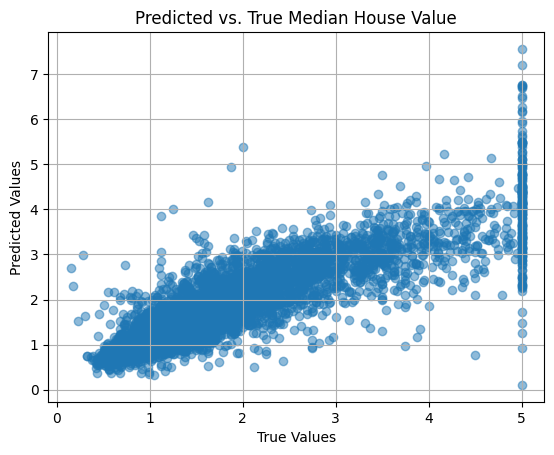

In [33]:
# Predictions
_, _, _, y_pred = forward_pass(X_test)

# Test loss
test_loss = mse(y_test, y_pred)
print(f"\nTest MSE: {test_loss}")

# Plot true vs predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. True Median House Value")
plt.grid(True)
plt.show()


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute additional metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Root Mean Squared Error (RMSE): 0.6278645118615758
Mean Absolute Error (MAE): 0.4421973310687147
R² Score: 0.6991673196681163


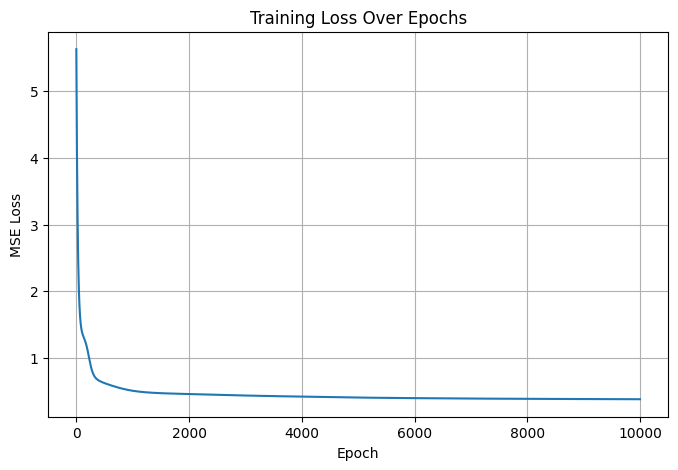

In [35]:
# Plot training loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


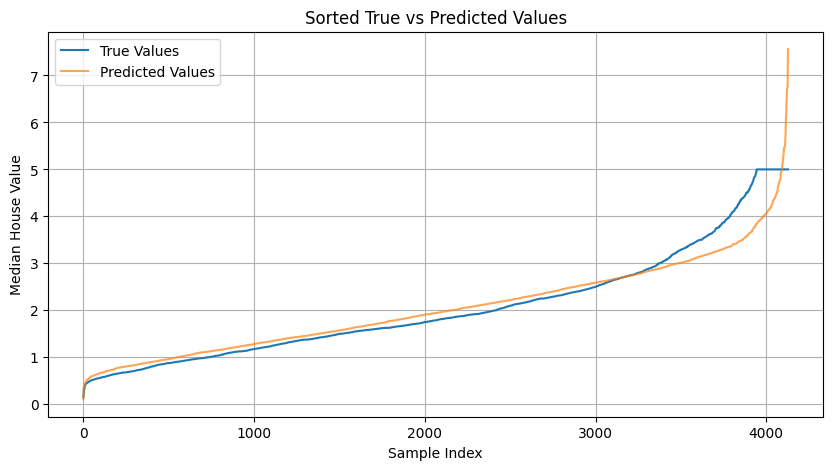

In [36]:
# Plot true vs predicted in sorted order
plt.figure(figsize=(10, 5))
plt.plot(sorted(y_test.flatten()), label='True Values')
plt.plot(sorted(y_pred.flatten()), label='Predicted Values', alpha=0.7)
plt.title("Sorted True vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Median House Value")
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

- Implemented a basic feedforward neural network from scratch using NumPy.
- Used ReLU activation in the hidden layer and a linear output layer for regression.
- Trained on California Housing dataset using gradient descent.
- Achieved reasonable performance with simple architecture and no libraries.

---

## Declaration

I, Kaustubh Wagh, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

- **GitHub Repository Link**: https://github.com/kostawagh/DeepLearningMDM
- **Signature**: Kaustubh Wagh
